# My first `Tidytuesday`

I've discovered the `Tidytuesday`event on Twitter via this tweet.  
{{< tweet 877500564405444608 >}} 

I really love the concept and I think it's a good way to share code and learn visualization techniques.   
This week the theme is about Ramens and here's my participation !

In [1]:
ramen_ratings <- readr::read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-06-04/ramen_ratings.csv")

Parsed with column specification:
cols(
  review_number = col_double(),
  brand = col_character(),
  variety = col_character(),
  style = col_character(),
  country = col_character(),
  stars = col_double()
)


In [2]:
library(tidyverse)
library(ggrepel)
library(cowplot)
library(ggthemes)

Warning message:
"package 'tidyverse' was built under R version 3.5.2"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.3.0
v tibble  2.0.1     v dplyr   0.7.8
v tidyr   0.8.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.3.0
Warning message:
"package 'ggplot2' was built under R version 3.5.2"Warning message:
"package 'tibble' was built under R version 3.5.2"Warning message:
"package 'tidyr' was built under R version 3.5.2"Warning message:
"package 'readr' was built under R version 3.5.2"Warning message:
"package 'purrr' was built under R version 3.5.2"Warning message:
"package 'dplyr' was built under R version 3.5.2"Warning message:
"package 'stringr' was built under R version 3.5.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'ggrepel' was built under R version 3.5.3"Warning mess

In [3]:
map_int(ramen_ratings, function(x) length(unique(x)))

review_number         brand       variety         style       country 
         3178           456          2971             9            44 
        stars 
           40

In [4]:
ramen_no_na <- ramen_ratings %>% na.omit

In [5]:
map_int(ramen_no_na, function(x) length(unique(x)))

review_number         brand       variety         style       country 
         3161           454          2955             8            44 
        stars 
           39

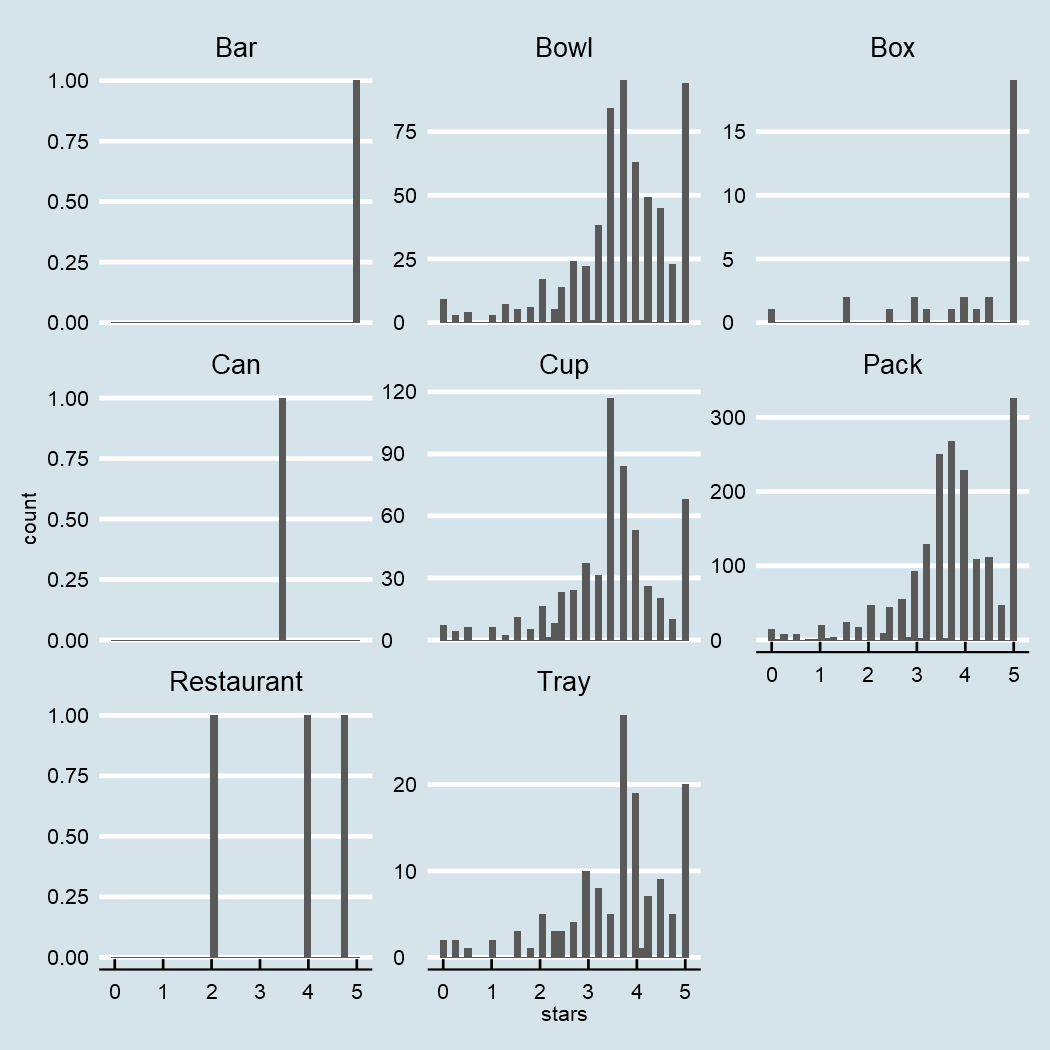

In [6]:
options(repr.plot.res = 150)
ramen_no_na %>% ggplot(aes(x = stars)) + 
geom_histogram(bins = 40) + facet_wrap(~style, scales = "free_y") +
theme_economist()

I will only plot the styles with high rating counts.

In [7]:
ramen_no_na <- ramen_no_na %>% 
mutate(country = str_replace(string = country, 
                             pattern = "USA", replacement = "United States"))

In [ ]:
scale_fill_viridis_c()

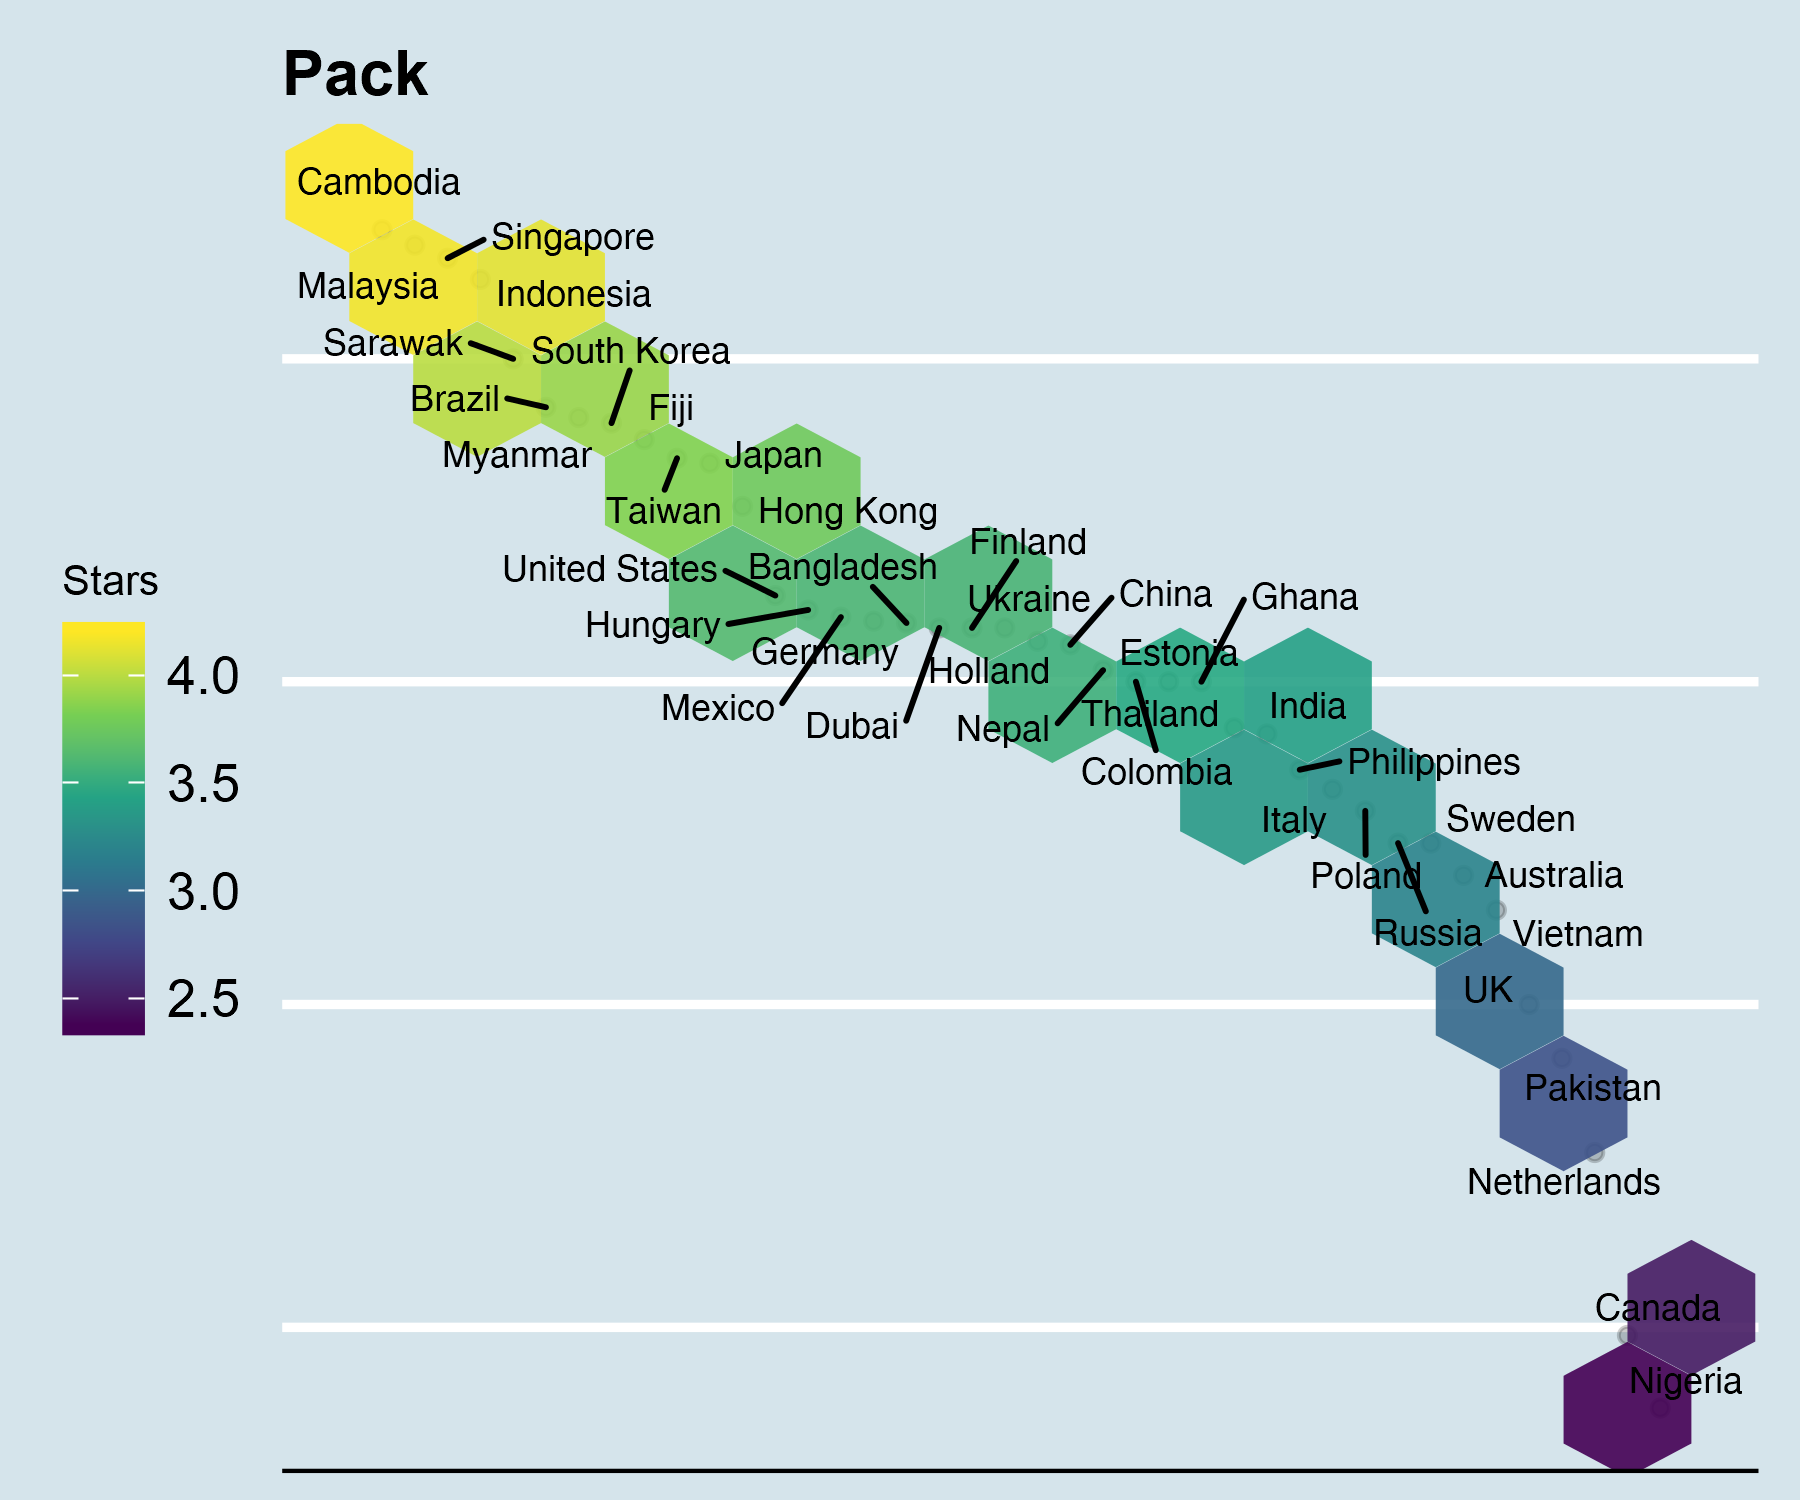

In [24]:
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 5)
ramen_no_na %>% filter(style == "Pack") %>%
group_by(country) %>% summarize( mean_rating = mean(stars)) %>%
arrange(desc(mean_rating)) %>% mutate(rank = 1:length(country)) %>%
ggplot(aes(y = mean_rating, x = rank)) + geom_point(alpha = 0.2) + 
stat_summary_hex(aes(z =  mean_rating), 
                   bins=10, fun = mean, alpha = 0.9) + 
geom_text_repel(aes(label = country), 
                size = 3, col = 'black') + 
scale_fill_viridis_c(name = "Stars") +
labs(title = "Pack") + theme_economist() + 
theme(legend.position = "left", legend.key.size = unit(7, "mm"),
      axis.title.y = element_blank(), axis.text.y = element_blank(),
     axis.title.x = element_blank(), axis.ticks.x = element_blank() ,axis.text.x = element_blank())

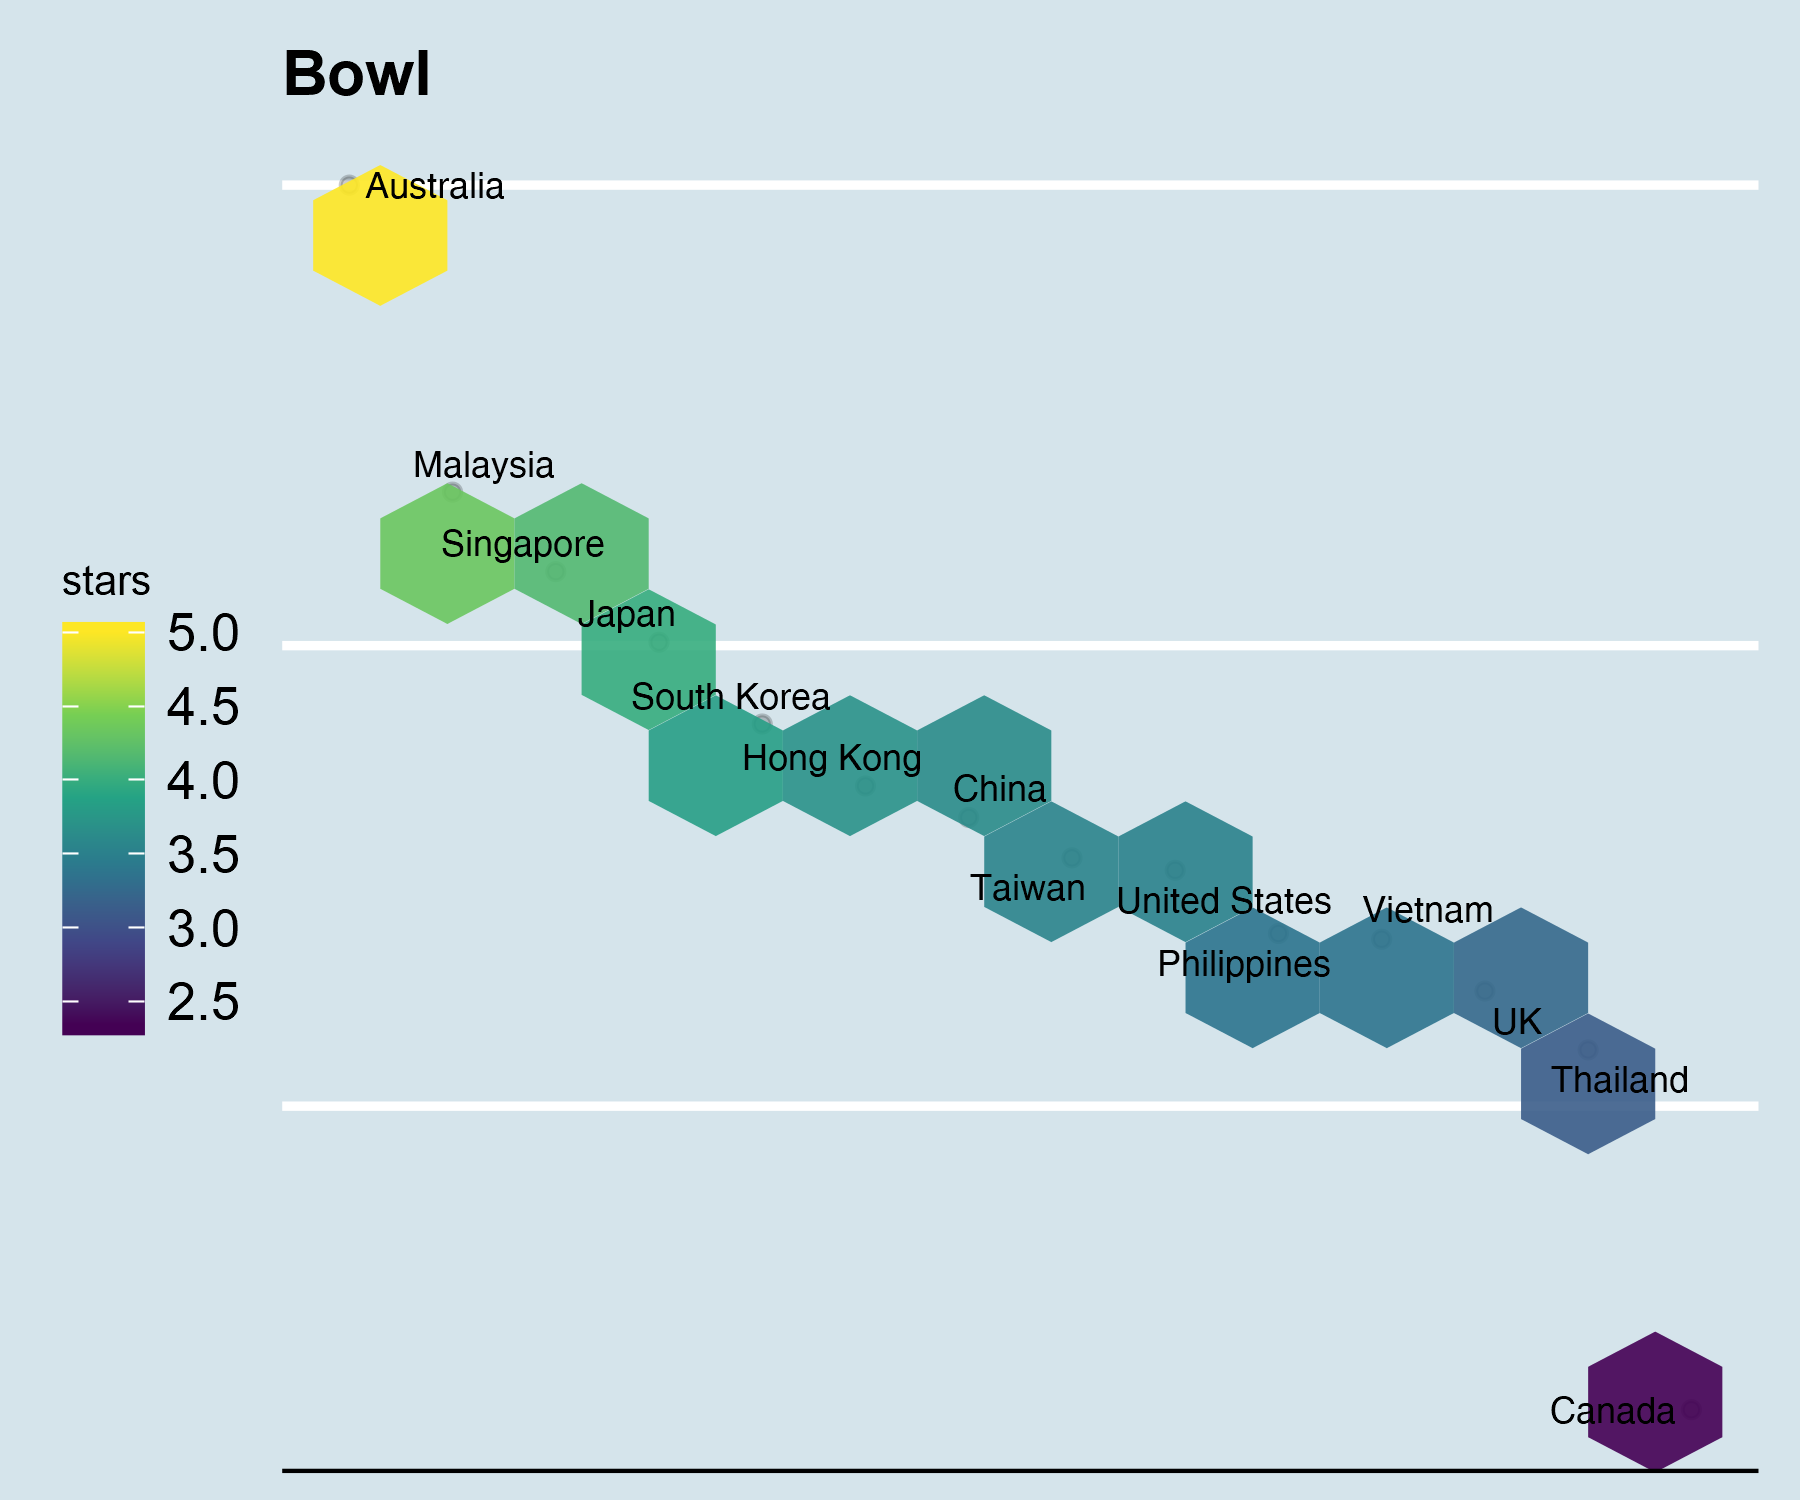

In [26]:
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 5)
ramen_no_na %>% filter(style == "Bowl") %>%
group_by(country) %>% summarize( mean_rating = mean(stars)) %>%
arrange(desc(mean_rating)) %>% mutate(rank = 1:length(country)) %>%
ggplot(aes(y = mean_rating, x = rank)) + geom_point(alpha = 0.2) + 
stat_summary_hex(aes(z =  mean_rating), 
                   bins=10, fun = mean, alpha = 0.9) + 
geom_text_repel(aes(label = country), 
                size = 3, col = 'black') + 
scale_fill_viridis_c(name="stars") +
labs(title = "Bowl") + theme_economist() + 
theme(legend.position = "left", legend.key.size = unit(7, "mm"),
      axis.title.y = element_blank(), axis.text.y = element_blank(),
     axis.title.x = element_blank(), axis.text.x = element_blank(), axis.ticks.x = element_blank())

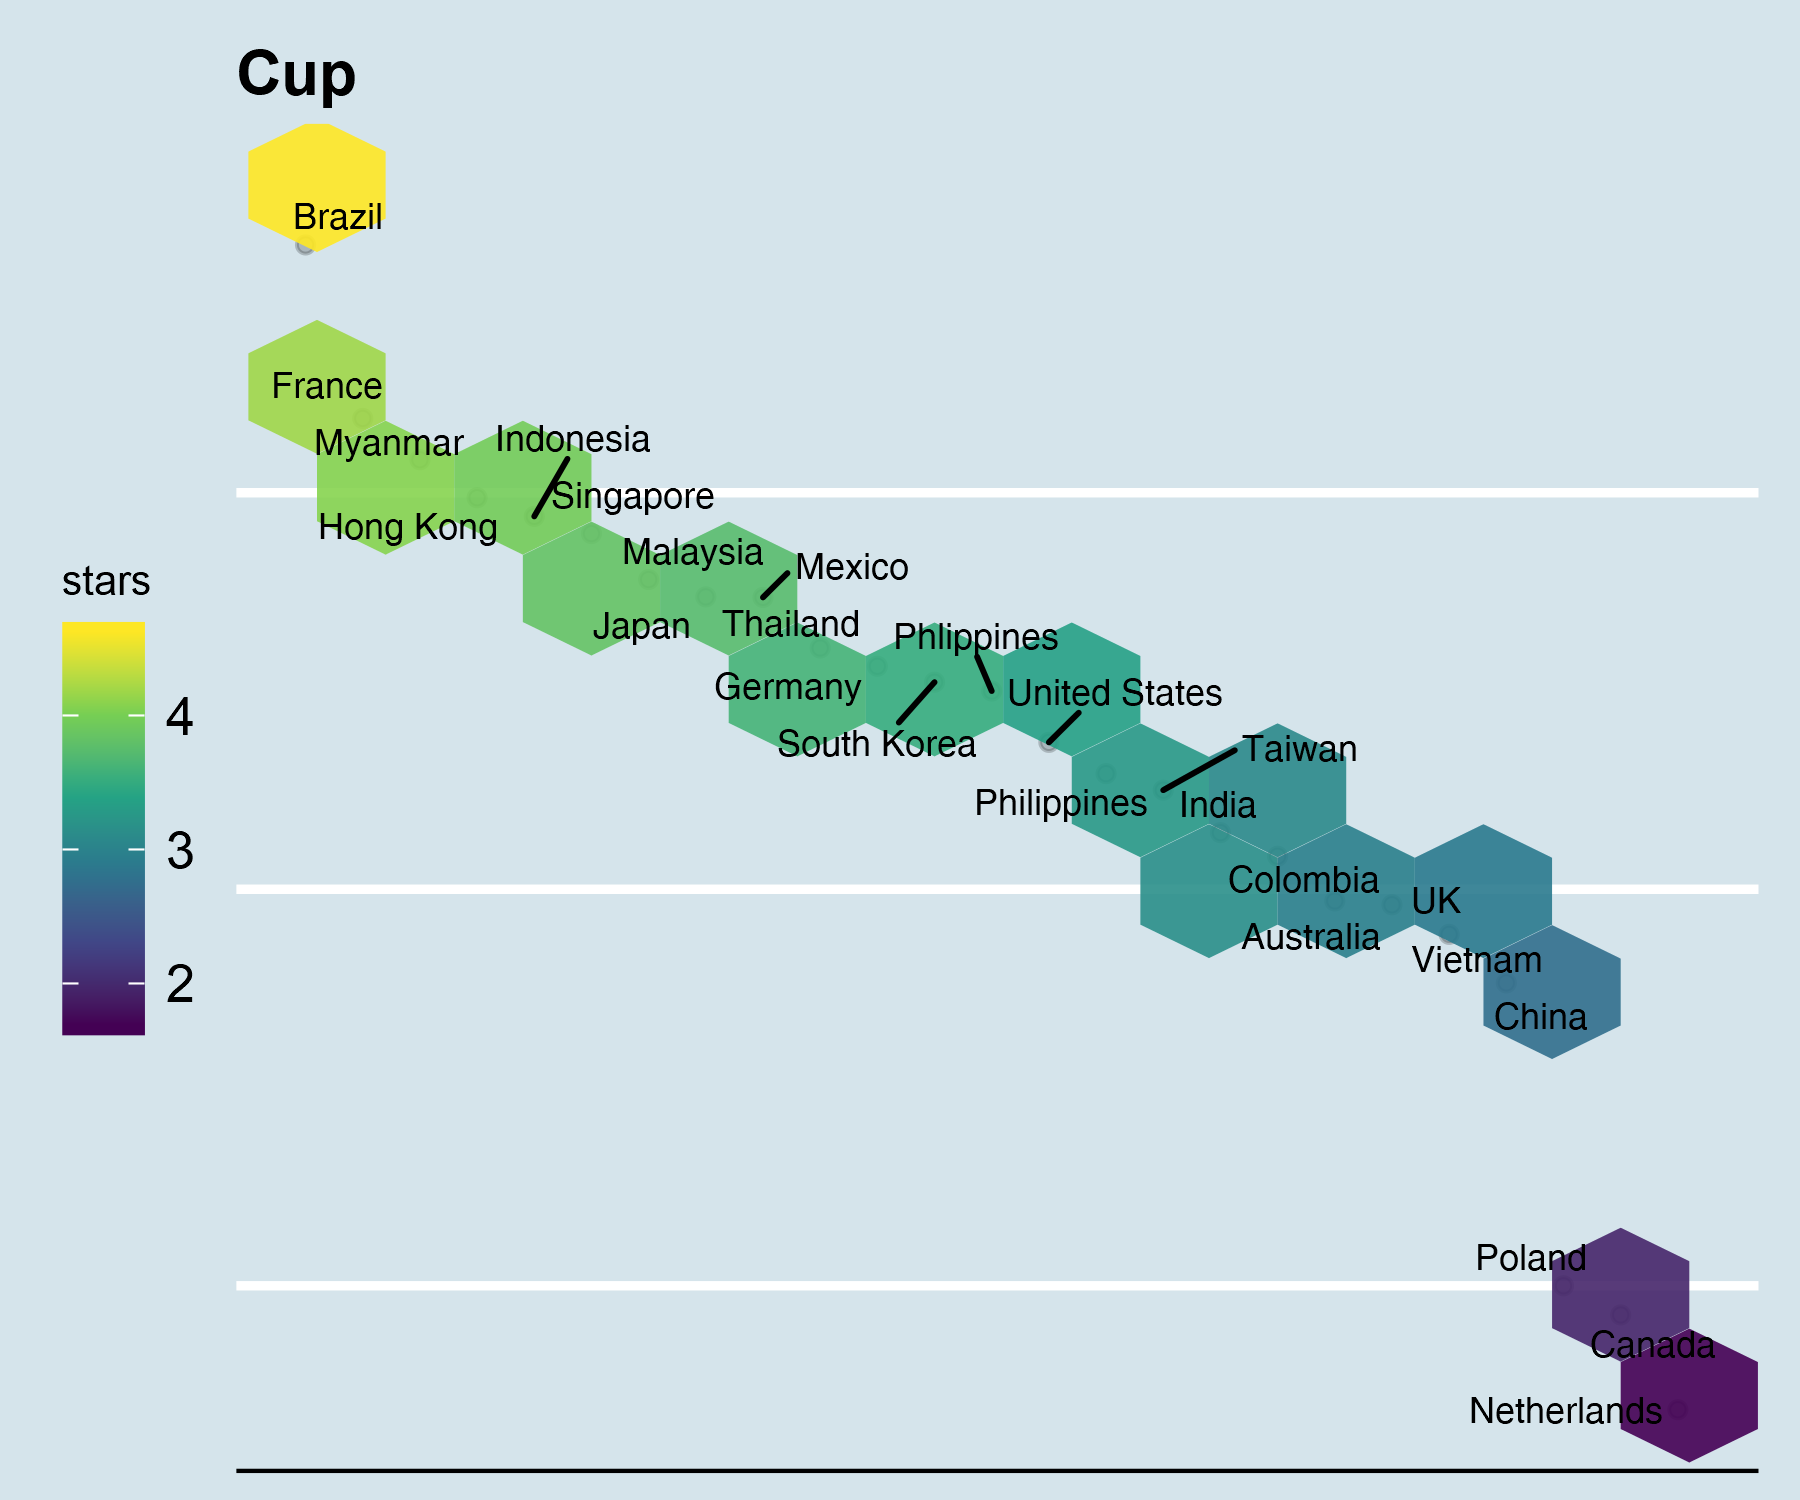

In [25]:
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 5)
ramen_no_na %>% filter(style == "Cup") %>%
group_by(country) %>% summarize( mean_rating = mean(stars)) %>%
arrange(desc(mean_rating)) %>% mutate(rank = 1:length(country)) %>%
ggplot(aes(y = mean_rating, x = rank)) + geom_point(alpha = 0.2) + 
stat_summary_hex(aes(z =  mean_rating), 
                   bins=10, fun = mean, alpha = 0.9) + 
geom_text_repel(aes(label = country), 
                size = 3, col = 'black') + 
scale_fill_viridis_c(name="stars") +
labs(title = "Cup") + theme_economist() + 
theme(legend.position = "left", legend.key.size = unit(7, "mm"),
      axis.title.y = element_blank(), axis.text.y = element_blank(),
     axis.title.x = element_blank(), 
      axis.text.x = element_blank(), axis.ticks.x = element_blank(), )

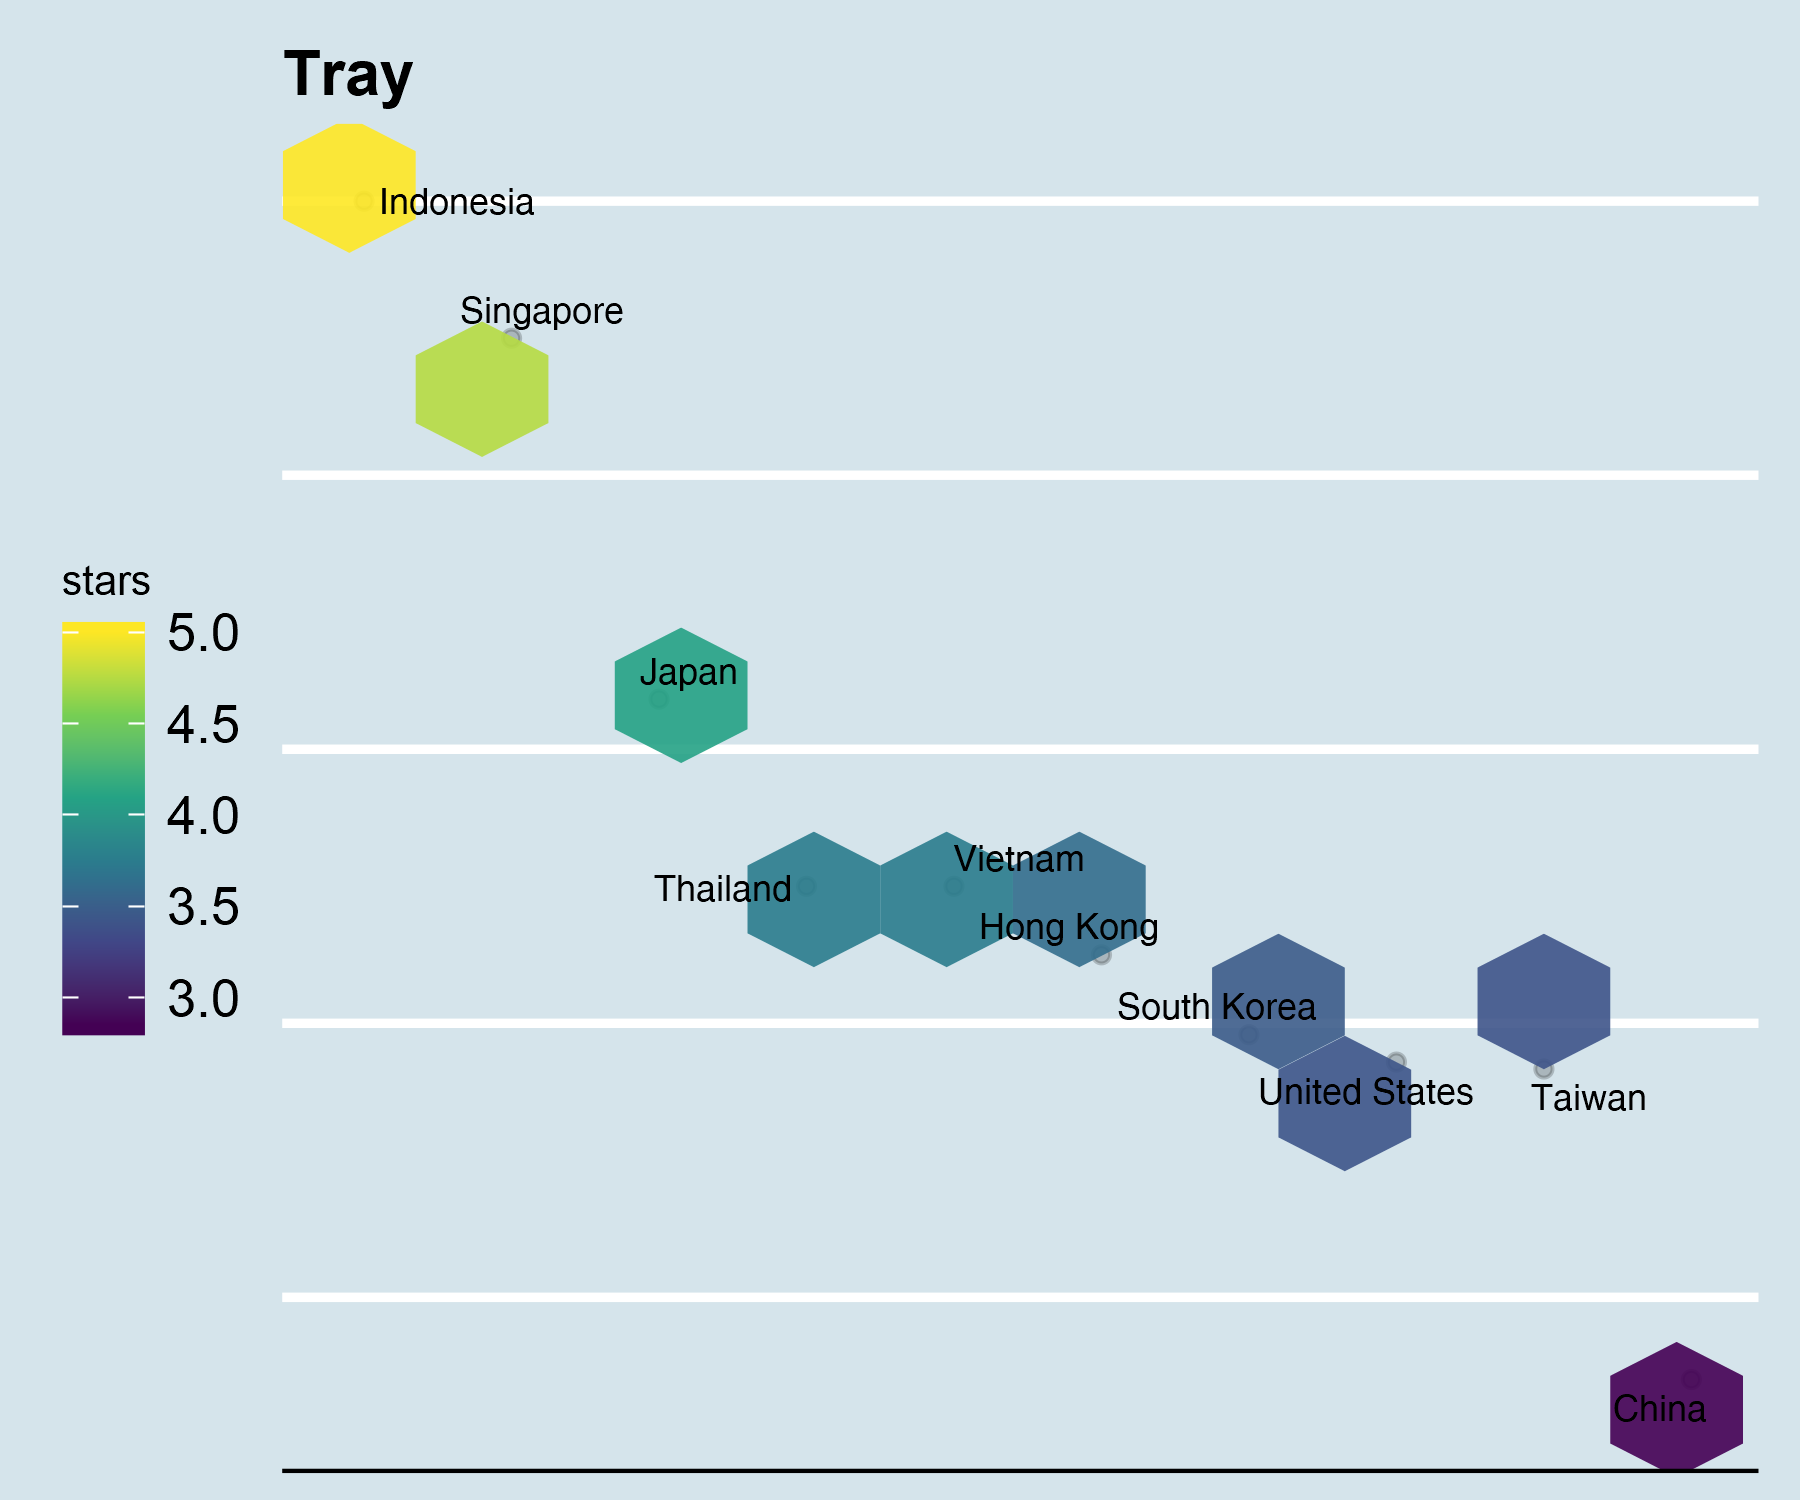

In [27]:
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 5)
ramen_no_na %>% filter(style == "Tray") %>%
group_by(country) %>% summarize( mean_rating = mean(stars)) %>%
arrange(desc(mean_rating)) %>% mutate(rank = 1:length(country)) %>%
ggplot(aes(y = mean_rating, x = rank)) + geom_point(alpha = 0.2) + 
stat_summary_hex(aes(z =  mean_rating), 
                   bins=10, fun = mean, alpha = 0.9) + 
geom_text_repel(aes(label = country), 
                size = 3, col = 'black') + 
scale_fill_viridis_c(name="stars") +
labs(title = "Tray") + theme_economist() + 
theme(legend.position = "left", legend.key.size = unit(7, "mm"),
      axis.title.y = element_blank(), axis.text.y = element_blank(),
     axis.title.x = element_blank(), axis.ticks.x = element_blank() ,axis.text.x = element_blank())